In [21]:
import pandas as pd
import numpy as np


In [22]:
df = pd.read_csv('/content/creditcard.csv')

In [23]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [25]:
df = df.sample(frac=1,random_state=1)
df = df.reset_index(drop= True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,0.070050,-0.854023,0.547347,0.616448,-0.101785,-0.608492,-0.288559,-0.606199,-0.900746,-0.201311,-0.196039,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
1,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,-0.600684,0.096501,0.710309,0.778924,0.353867,0.953048,-0.103542,0.128899,-0.964070,-0.477130,-0.009041,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
2,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,-0.528357,-0.813214,0.111898,1.133875,-0.649766,0.861035,0.583787,-0.344094,0.028312,0.219760,0.206028,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
3,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,0.334853,0.905210,-0.277872,-1.336179,-0.012238,0.212828,0.769345,-1.010534,0.357288,-0.125585,0.315823,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
4,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,-0.696578,0.101512,-0.433200,-0.634867,-1.188354,1.028063,0.576121,1.068353,0.332690,-0.362811,-0.105286,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0


In [33]:
df = df.dropna()

In [36]:
as_np = df.to_numpy()

In [37]:
index = int(len(as_np)*.92)
X_train , y_train = as_np[:index, : -1], as_np[:index, -1]
X_test, y_test= as_np[index:, : -1], as_np[index:, -1]

X_train.shape , X_test.shape

((262022, 30), (22785, 30))

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train , y_train)
test_pred = model.predict(X_test)

pd.value_counts(test_pred)

0.0    22757
1.0       28
dtype: int64

#Confusion Matrix

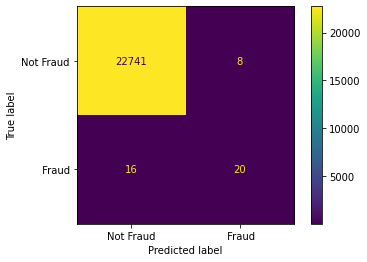

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(cm , display_labels=['Not Fraud',' Fraud'])
disp.plot()

In [44]:
cm.ravel()

array([22741,     8,    16,    20])

In [52]:
tn , fp , fn ,tp = cm.ravel()

Accuracy

In [55]:
def accuracy(tn,fp,fn,tp):
  return (tp + tn) /(tp+fp+fn+tn)

' Accuracy {0}'.format(accuracy(tn,fp,fn,tp))

' Accuracy 0.9989466754443713'

Recall ( sensitivity / true positive rate )  = true positives over all the positives  =>  tp / tp + fn  ( because fn are in reality positive we just predicted them wrong !!) 

In [56]:
def recall(tn,fp,fn,tp):
  return tp /( tp + fn )

"Recall: {0}".format(recall(tn,fp,fn,tp))

'Recall: 0.5555555555555556'

this is how much of the true negatives we correctly classified, but is there a formula of how much of true negatives we missclassified! yes

False negative rate = false negative over all positives  fn / tp + fn

# Specifity 

specifity / true negative rate = true negative over all the negatives so ( tn / tn + fp ) remember false positives are actually negatives that we predicted wrong!

In [58]:
def tnr(tn,fp,fn,tp):
  return tn /( tn + fp )

"true negative rate: {0}".format(tnr(tn,fp,fn,tp))

'Recall: 0.9996483361906018'

#Precision

the true positives over all predicted positives  tp / tp + fp



In [59]:
def precision(tn,fp,fn,tp):
  return tp /( tp + fp )

"precision: {0}".format(precision(tn,fp,fn,tp))

'precision: 0.7142857142857143'

# Balanced Accuracy 

true postive rate + true negative rate / 2

In [60]:
def balanced_acc(tn,fp,fn,tp):
  return (recall(tn,fp,fn,tp) + tnr(tn,fp,fn,tp))/2

" BALANCED ACC {0}".format(balanced_acc(tn,fp,fn,tp))


' BALANCED ACC 0.7776019458730787'

In [63]:
def f1_score(tn,fp,fn,tp):
  return (2*recall(tn,fp,fn,tp)*precision(tn,fp,fn,tp))/(recall(tn,fp,fn,tp)+precision(tn,fp,fn,tp))

In [64]:
"F1 score {0}".format(f1_score(tn,fp,fn,tp))

'F1 score 0.6250000000000001'

In [65]:
probabilities = model.predict_proba(X_test)[:,1]
probabilities

array([0.00012139, 0.0003532 , 0.00030147, ..., 0.00473659, 0.00017273,
       0.00171865])

In [68]:
pd.value_counts(probabilities > 0.5)

False    22757
True        28
dtype: int64